In [2]:
from langgraph.graph import StateGraph, START , END
from typing import Dict,TypedDict

In [3]:
class AgentState(TypedDict):
    number1: int
    operation : str
    number2: int
    finalNumber : int

In [ ]:
def adder(state:AgentState) -> AgentState:
    """ this is the function to add two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']

    return state

def subtractor(state:AgentState) -> AgentState:
    """ this is the function to subtract two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']

    return state

def decide_next_node(state:AgentState) -> AgentState:
    """this function decides either to add or subtract"""
    if state['operation'] == '+':
        return "addition_op"
    elif state['operation'] == '-':
        return "subt_op"

In [7]:
graph = StateGraph(AgentState)

graph.add_node("router" , lambda state:state)
graph.add_node("adder" , adder)
graph.add_node("subtractor" , subtractor)

graph.add_edge(START , "router")
graph.add_conditional_edges( 
    "router",
    decide_next_node,
    {
        # EDGE : NODE
        "addition_op" : "adder",
        "subt_op" : "subtractor"
    }
)
graph.add_edge("adder" , END)
graph.add_edge("subtractor" , END)

app = graph.compile()

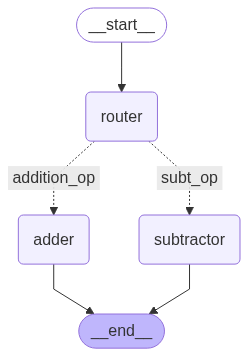

In [8]:
app

In [10]:
initial_state_1 = AgentState(number1=10, number2=15, operation='+')

app.invoke(initial_state_1)

{'number1': 10, 'operation': '+', 'number2': 15, 'finalNumber': 25}